In [264]:
import os
import cv2
import numpy as np

In [270]:
# Function to load and preprocess images
def load_and_preprocess_images(path, urls, target, image_size=(100, 100)):
    images = []
    labels = []

    for image_url in urls:
        image_path = os.path.join(path, image_url)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Cannot read the image: {image_path}")
            continue

        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalize pixel values
        img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
        
        images.append(img)
        labels.append(target)

    return np.array(images), np.array(labels)


In [272]:
# Load and preprocess COVID images
covid_path = "D:\\AI\\Electropi\\5.Deep Neural Networks [NN2]\\5.capstone\\BrainMentors Pvt Ltd\\CNN\\Data and code\\COVID-19_Radiography_Dataset\\COVID\\images"
covid_urls = os.listdir(covid_path)
covidImages, covidTargets = load_and_preprocess_images(covid_path, covid_urls, 1)

In [273]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [274]:
# Load and preprocess Normal images
normal_path = "D:\\AI\\Electropi\\5.Deep Neural Networks [NN2]\\5.capstone\\BrainMentors Pvt Ltd\\CNN\\Data and code\\COVID-19_Radiography_Dataset\\Normal\\images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = load_and_preprocess_images(normal_path, normal_urls, 0)

In [275]:
# Combine COVID and Normal images
data = np.concatenate([covidImages, normalImages])
targets = np.concatenate([covidTargets, normalTargets])

In [276]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=42)


In [277]:
# Display shapes
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (10356, 100, 100, 3)
Shape of y_train: (10356,)
Shape of x_test: (3452, 100, 100, 3)
Shape of y_test: (3452,)


In [278]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [279]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [282]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [283]:
# Train the model using a generator
def image_generator(images, labels, batch_size):
    num_samples = len(images)
    while True:
        indices = np.random.choice(num_samples, batch_size, replace=False)
        batch_images = images[indices]
        batch_labels = labels[indices]
        yield batch_images, batch_labels

In [284]:
batch_size = 32
train_generator = image_generator(x_train, y_train, batch_size)

# Train the model
epochs = 5
steps_per_epoch = len(x_train) // batch_size
model.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=(x_test, y_test))

Epoch 1/5
323/323 [==============================] - 54s 162ms/step - loss: 0.3544 - accuracy: 0.8348 - val_loss: 0.2708 - val_accuracy: 0.8835
Epoch 2/5
323/323 [==============================] - 57s 175ms/step - loss: 0.2148 - accuracy: 0.9124 - val_loss: 0.2489 - val_accuracy: 0.8980
Epoch 3/5
323/323 [==============================] - 51s 159ms/step - loss: 0.1501 - accuracy: 0.9455 - val_loss: 0.2085 - val_accuracy: 0.9145
Epoch 4/5
323/323 [==============================] - 51s 158ms/step - loss: 0.1069 - accuracy: 0.9613 - val_loss: 0.1630 - val_accuracy: 0.9397
Epoch 5/5
323/323 [==============================] - 52s 161ms/step - loss: 0.0839 - accuracy: 0.9696 - val_loss: 0.1477 - val_accuracy: 0.9464


In [287]:
print(model.history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


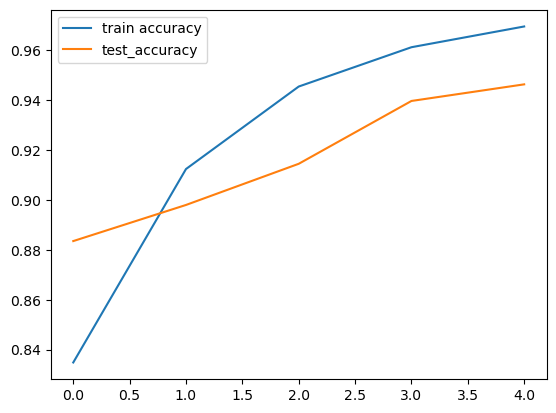

In [285]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

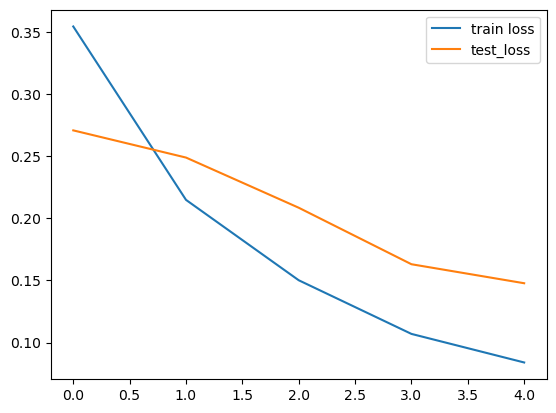

In [286]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

108/108 [==============================] - 3s 32ms/step


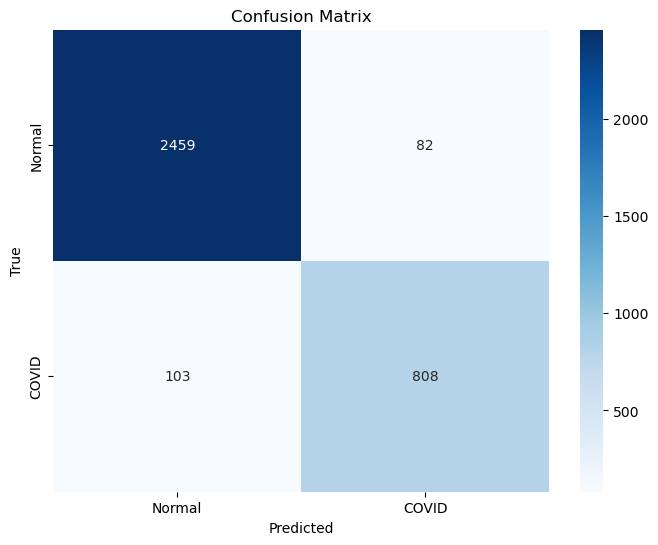

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96      2541
       COVID       0.91      0.89      0.90       911

    accuracy                           0.95      3452
   macro avg       0.93      0.93      0.93      3452
weighted avg       0.95      0.95      0.95      3452



In [309]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Convert one-hot encoded true labels to class labels
y_true_classes = y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'COVID'], yticklabels=['Normal', 'COVID'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=['Normal', 'COVID']))


In [ ]:
print(model.history.history.keys())


In [312]:
# Assuming new_data is your new dataset (images)
# Load and preprocess the new data similar to what you did for the training data

# Example function to load and preprocess new images
def load_and_preprocess_new_data(path, urls, image_size=(100, 100)):
    images = []

    for image_url in urls:
        image_path = os.path.join(path, image_url)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Cannot read the image: {image_path}")
            continue

        img = cv2.resize(img, image_size)
        img = img / 255.0  # Normalize pixel values
        img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)

        images.append(img)

    return np.array(images)

# Example usage
new_data_path = r"D:\AI\Electropi\5.Deep Neural Networks [NN2]\5.capstone\BrainMentors Pvt Ltd\CNN\newdata"
new_data_urls = os.listdir(new_data_path)

# Load and preprocess the new data
new_data = load_and_preprocess_new_data(new_data_path, new_data_urls)

# Make predictions on the new data
new_predictions = model.predict(new_data)

# Assuming binary classification, round predictions to get class labels
new_predictions_classes = np.round(new_predictions)

# Display the predictions
print("Predictions for new data:")
print(new_predictions_classes)



1/1 [==============================] - 0s 44ms/step
Predictions for new data:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# def image_generator(images, labels, batch_size):
#     num_samples = len(images)
#     while True:
#         # Select random indices without replacement to create a batch
#         indices = np.random.choice(num_samples, batch_size, replace=False)
        
#         # Use the selected indices to get the corresponding images and labels
#         batch_images = images[indices]
#         batch_labels = labels[indices]
        
#         # Yield the batch of images and labels
#         yield batch_images, batch_labels


In [ ]:
# Let's go through each part:

# num_samples = len(images): Determines the total number of samples in the dataset (length of images array).

# while True:: This creates an infinite loop, allowing the generator to keep generating batches indefinitely during training.

# indices = np.random.choice(num_samples, batch_size, replace=False): Randomly selects batch_size indices from the total number of samples without replacement. This ensures that each sample is selected only once in a batch.

# batch_images = images[indices] and batch_labels = labels[indices]: Use the randomly selected indices to extract the corresponding images and labels from the dataset, creating a batch.

# yield batch_images, batch_labels: This statement yields the batch of images and labels to the training loop. When the generator is called, it returns the batch, and the training loop uses it to update the model's weights.

# The purpose of using a generator is to efficiently load and process data in chunks, reducing memory usage and allowing training on large datasets.

